<a href="https://colab.research.google.com/github/Chernyakovak/-_Python_-/blob/main/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%85%D1%8B_%D0%A2_%D0%B1%D0%B0%D0%BD%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5 урок Т-образование


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# Загрузка данных
df = pd.read_csv('/content/sample_data/data_tbank.csv')
# Преобразование столбца TotalCharges в числовой формат (ошибки станут NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# ------------------------------------------------------------
# Задание 1
# Давайте продолжим искать переменные, которые разделяют факт ухода клиента.
# Посмотрим, влияет ли флаг пенсионера на вероятность оттока.
# Постройте диаграмму, которая могла бы ответить на этот вопрос.
# ------------------------------------------------------------

# ------------------------------------------------------------
# Задание 2
# Если у клиента подключен интернет, то ему доступны 6 дополнительных услуг:
# онлайн защита, онлайновое резервное копирование, защита устройства,
# наличие ТВ, наличие доступа к фильмам.
# Скорее всего, чтобы удержать клиента нам выгодно по-максимуму погружать его
# в нашу экосистему. Давайте посмотрим, зависит ли % оттекших клиентов
# от кол-ва услуг, которые у них были подключены (по клиентам, у кого подключен интернет)?
# Одинаковая ли зависимость на разных типах интернета?
# Подберите тип визуализации и постройте график\диаграмму, который смог бы ответить
# на эти вопросы.
# ------------------------------------------------------------

## **Задание 1**
Давайте продолжим искать переменные, которые разделяют факт ухода клиента.
Посмотрим, влияет ли флаг пенсионера на вероятность оттока.
Постройте диаграмму, которая могла бы ответить на этот вопрос.

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,tenure_group,OnlineSecurity_flg,OnlineBackup_flg,DeviceProtection_flg,TechSupport_flg,StreamingTV_flg,StreamingMovies_flg,Churn_flg,N_services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,0-5,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,30-35,1.0,0.0,1.0,0.0,0.0,0.0,0,2.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,0-5,1.0,1.0,0.0,0.0,0.0,0.0,1,2.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,42-47,1.0,0.0,1.0,1.0,0.0,0.0,0,3.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,0-5,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


In [20]:
df.info()
df[['SeniorCitizen', 'tenure']].head()
df['Churn']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


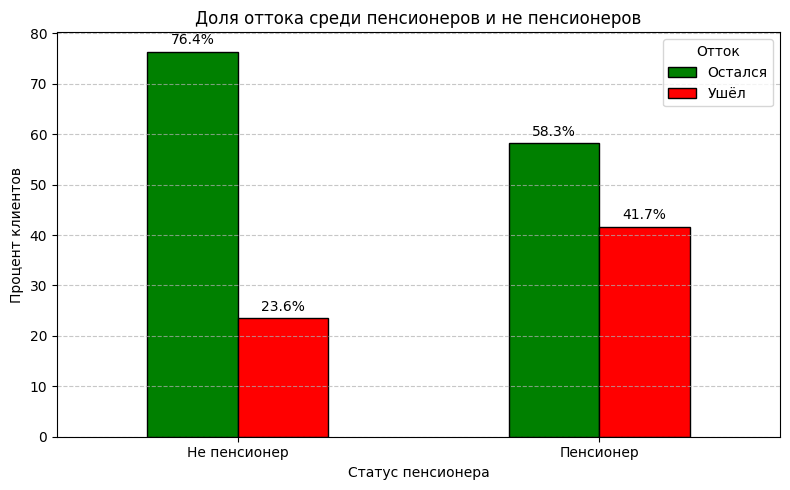

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что df уже загружен (например, из WA_Fn-UseC_-Telco-Customer-Churn.csv)
# Если нет:
# df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Строим таблицу сопряжённости с процентами по строкам (по группам SeniorCitizen)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Столбчатая диаграмма с группировкой (столбцы рядом)
ax = ct.plot(kind='bar', color=['green', 'red'], figsize=(8, 5), edgecolor='black')
plt.title('Доля оттока среди пенсионеров и не пенсионеров')
plt.xlabel('Статус пенсионера')
plt.ylabel('Процент клиентов')
plt.xticks(ticks=[0, 1], labels=['Не пенсионер', 'Пенсионер'], rotation=0)
plt.legend(title='Отток', labels=['Остался', 'Ушёл'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем значения на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [18]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

# Задание 2
Если у клиента подключен интернет, то ему доступны 6 дополнительных услуг: онлайн защита, онлайновое резервное копирование, защита устройства, наличие ТВ, наличие доступа к фильмам. Скорее всего, чтобы удержать клиента, нам выгодно по максимуму погружать его в нашу экосистему. Давайте посмотрим, зависит ли процент оттекающих клиентов от количества услуг, которые у них были подключены (рассматривая только клиентов, у которых подключен интернет)? Одинакова ли эта зависимость на разных типах интернета? Подберите тип визуализации и постройте график/диаграмму, который смог бы ответить на эти вопросы.



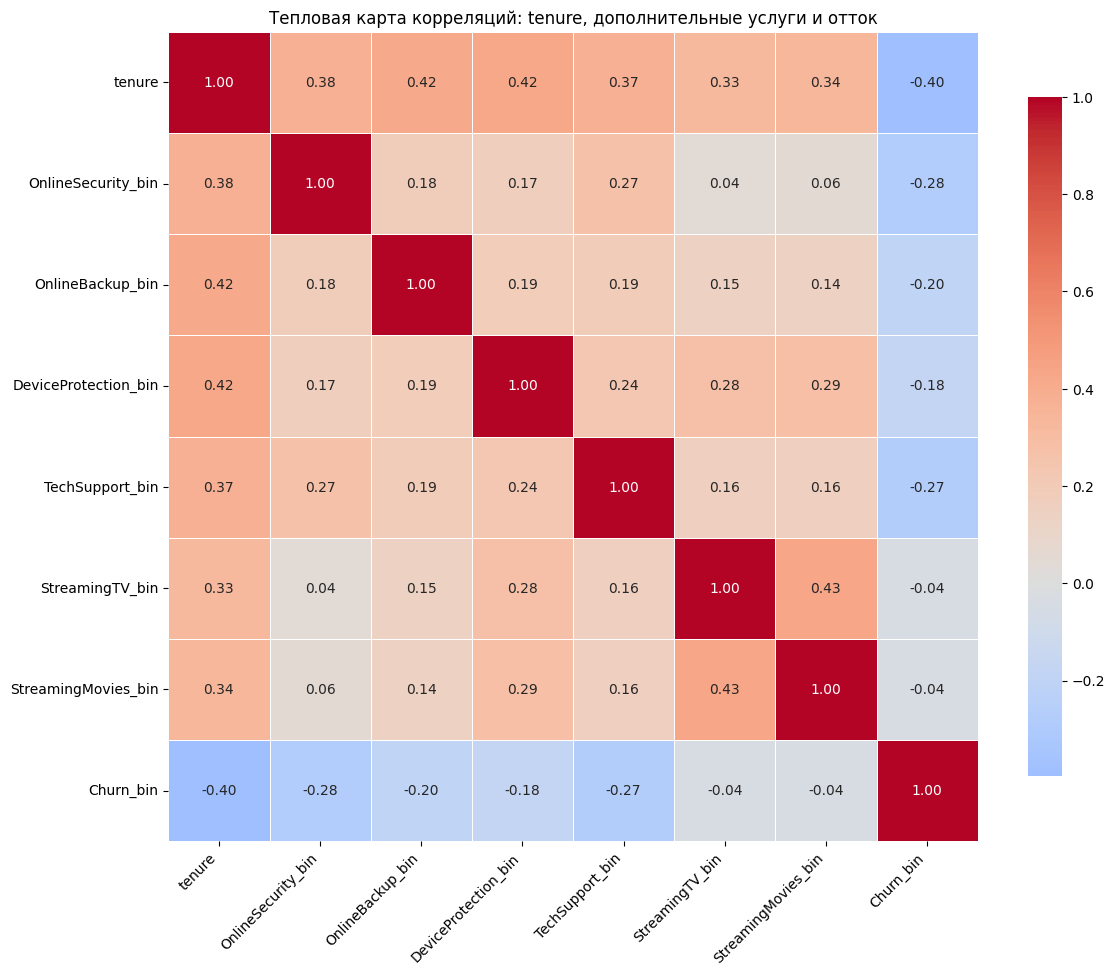

In [26]:


# Предполагаем, что df_internet уже создан (фильтр по InternetService != 'No')
# и есть бинарные столбцы для услуг и Churn

# Добавляем tenure в набор данных для корреляции
# Убедимся, что tenure числовой (он уже такой)
corr_data = df_internet[['tenure'] + [s + '_bin' for s in services] + ['Churn_bin']]

# Вычисляем матрицу корреляций
corr_matrix = corr_data.corr()

# Строим тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8},
            fmt='.2f')  # два знака после запятой
plt.title('Тепловая карта корреляций: tenure, дополнительные услуги и отток')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

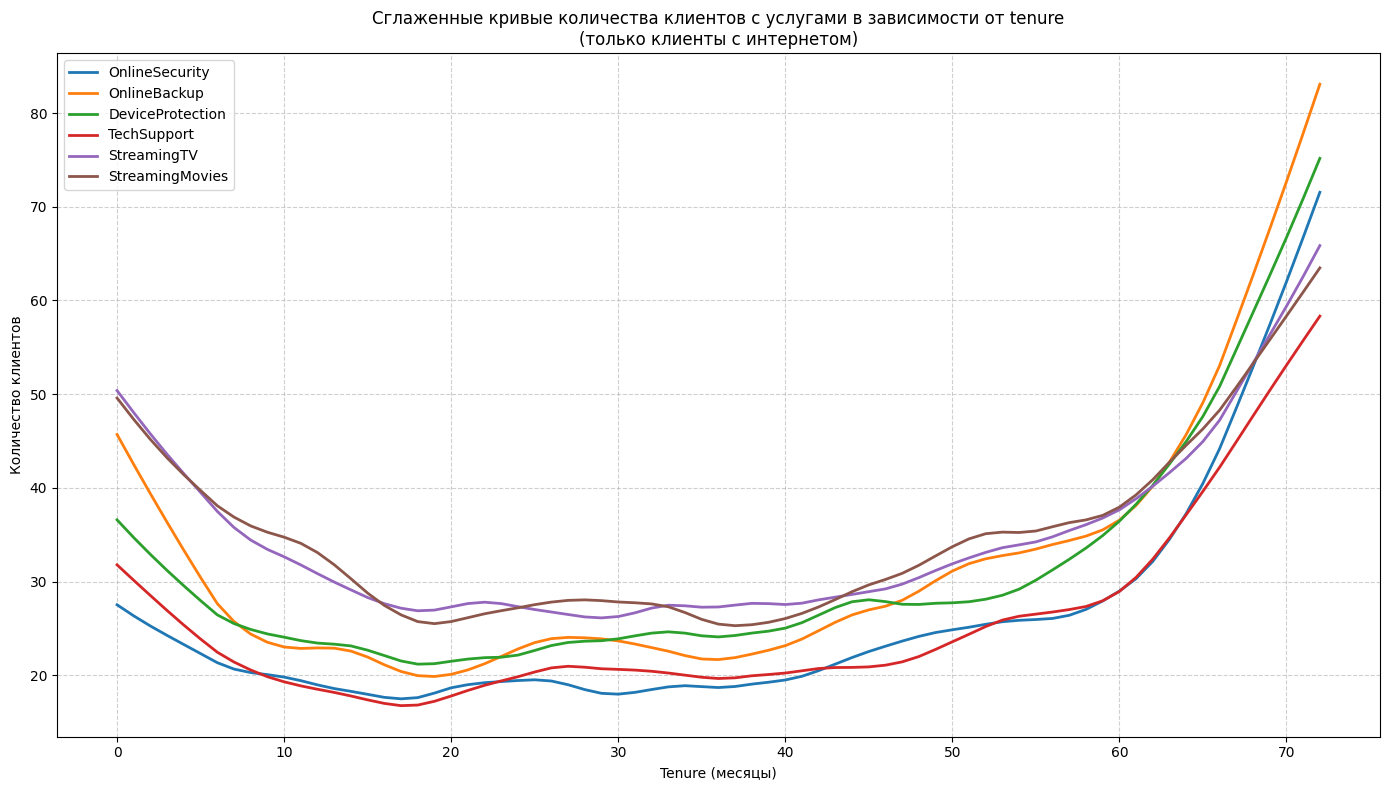

In [23]:
# 5. "Винтажная карта": количество пользователей с каждой услугой в зависимости от tenure
# Группируем по tenure и считаем количество клиентов с услугой = Yes
tenure_counts = df_internet.groupby('tenure').agg(
    {s: lambda x: (x == 'Yes').sum() for s in services}
).reset_index()

# Сглаживание методом LOWESS для каждой услуги
plt.figure(figsize=(14, 8))
for service in services:
    # Исходные точки
    x = tenure_counts['tenure']
    y = tenure_counts[service]
    # Применяем LOWESS (frac = 0.2 — доля данных для локальной регрессии)
    smoothed = lowess(y, x, frac=0.2, return_sorted=False)
    plt.plot(x, smoothed, label=service, linewidth=2)

plt.title('Сглаженные кривые количества клиентов с услугами в зависимости от tenure\n(только клиенты с интернетом)')
plt.xlabel('Tenure (месяцы)')
plt.ylabel('Количество клиентов')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [31]:

df['OnlineSecurity_flg']=df['OnlineSecurity'].map({'No': 0, 'Yes': 1})
df['OnlineBackup_flg']=df['OnlineBackup'].map({'No': 0, 'Yes': 1})
df['DeviceProtection_flg']=df['DeviceProtection'].map({'No': 0, 'Yes': 1})
df['TechSupport_flg']=df['TechSupport'].map({'No': 0, 'Yes': 1})
df['StreamingTV_flg']=df['StreamingTV'].map({'No': 0, 'Yes': 1})
df['StreamingMovies_flg']=df['StreamingMovies'].map({'No': 0, 'Yes': 1})
df['Churn_flg']=df['Churn'].map({'No': 0, 'Yes': 1})

df['N_services'] = (df['OnlineSecurity_flg'] + df['OnlineBackup_flg']
+ df['DeviceProtection_flg'] + df['TechSupport_flg']
+ df['StreamingTV_flg'] + df['StreamingMovies_flg'])

table = df.groupby(['InternetService','N_services']).agg({'customerID':'nunique','Churn_flg':'mean'}).reset_index()
table

fig = go.Figure()

fig.add_trace(go.Scatter(x=table.query('InternetService=="DSL"')['N_services'],
                         y=table.query('InternetService=="DSL"')['Churn_flg'],
                    mode='lines',
                    name='DSL'))

fig.add_trace(go.Scatter(x=table.query('InternetService=="Fiber optic"')['N_services'],
                         y=table.query('InternetService=="Fiber optic"')['Churn_flg'],
                    mode='lines',
                    name='Fiber optic'))
fig.update_layout(
    width=800,
    height=600,
    title='Зависимость % ушедших клиентов от кол-ва подключенных доп услуг',
    xaxis_title='число подкл услуг',
    yaxis_title='% ушедших клиентов'
)
fig.show()

# **Решение**

,SeniorCitizen,Churn,count
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


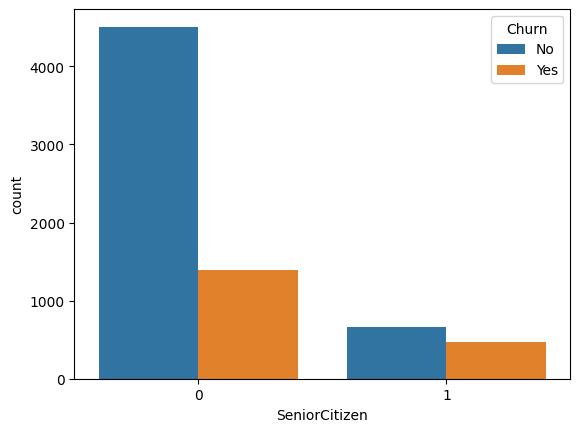

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

df_1=df.groupby(['SeniorCitizen','Churn']).agg({'customerID':'nunique'}).reset_index()
df_1.columns = ['SeniorCitizen','Churn','count']


sns.barplot(data=df_1, x="SeniorCitizen", y="count" ,hue="Churn")
df_1

In [38]:


fig = px.histogram(
    data_frame=df,
    x="SeniorCitizen",
    color="Churn",
    title="Кол-во <b>ушедших</b> и <b>неушедших</b> клиентов в зависимости от флага пенсионера",
    histnorm="density",
)

fig.update_xaxes(categoryorder="total descending")

fig.show()

In [32]:


df['OnlineSecurity_flg']=df['OnlineSecurity'].map({'No': 0, 'Yes': 1})
df['OnlineBackup_flg']=df['OnlineBackup'].map({'No': 0, 'Yes': 1})
df['DeviceProtection_flg']=df['DeviceProtection'].map({'No': 0, 'Yes': 1})
df['TechSupport_flg']=df['TechSupport'].map({'No': 0, 'Yes': 1})
df['StreamingTV_flg']=df['StreamingTV'].map({'No': 0, 'Yes': 1})
df['StreamingMovies_flg']=df['StreamingMovies'].map({'No': 0, 'Yes': 1})
df['Churn_flg']=df['Churn'].map({'No': 0, 'Yes': 1})

df['N_services'] = (df['OnlineSecurity_flg'] + df['OnlineBackup_flg']
+ df['DeviceProtection_flg'] + df['TechSupport_flg']
+ df['StreamingTV_flg'] + df['StreamingMovies_flg'])

table = df.groupby(['InternetService','N_services']).agg({'customerID':'nunique','Churn_flg':'mean'}).reset_index()
table

fig = go.Figure()

fig.add_trace(go.Scatter(x=table.query('InternetService=="DSL"')['N_services'],
                         y=table.query('InternetService=="DSL"')['Churn_flg'],
                    mode='lines',
                    name='DSL'))

fig.add_trace(go.Scatter(x=table.query('InternetService=="Fiber optic"')['N_services'],
                         y=table.query('InternetService=="Fiber optic"')['Churn_flg'],
                    mode='lines',
                    name='Fiber optic'))
fig.update_layout(
    width=800,
    height=600,
    title='Зависимость % ушедших клиентов от кол-ва подключенных доп услуг',
    xaxis_title='число подкл услуг',
    yaxis_title='% ушедших клиентов'
)
fig.show()